<a href="https://colab.research.google.com/github/raj-vijay/mv/blob/master/Image%20Processing/14_Image_Processing_Experiments_Application_Photo_Restoration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Restore Damaged Photos**

In [0]:
import matplotlib.pyplot as plt
import numpy as np
def show_image(image, title='Image', cmap_type='gray'):
  plt.imshow(image, cmap=cmap_type)
  plt.title(title)
  plt.axis('on')
  plt.show()

In [0]:
def plot_comparison(original, filtered, title_filtered):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True,
  sharey=True)
  ax1.imshow(original, cmap=plt.cm.gray)
  ax1.set_title('Original')
  ax1.axis('off')
  ax2.imshow(filtered, cmap=plt.cm.gray)
  ax2.set_title(title_filtered)
  ax2.axis('off')

In [0]:
def get_mask(image):
    # Create mask with three defect regions: left, middle, right respectively
    mask_for_solution = np.zeros(image.shape[:-1])
    mask_for_solution[450:475, 470:495] = 1
    mask_for_solution[320:355, 140:175] = 1
    mask_for_solution[130:155, 345:370] = 1
    return mask_for_solution

In [3]:
# Load Image
!wget https://assets.datacamp.com/production/repositories/4470/datasets/bb7a75247648a4aa81159eec6f3c35be28629a35/sally_damaged_image.jpg

--2020-04-30 13:39:47--  https://assets.datacamp.com/production/repositories/4470/datasets/bb7a75247648a4aa81159eec6f3c35be28629a35/sally_damaged_image.jpg
Resolving assets.datacamp.com (assets.datacamp.com)... 13.226.45.40, 13.226.45.22, 13.226.45.81, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|13.226.45.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80582 (79K) [image/jpeg]
Saving to: ‘sally_damaged_image.jpg’

sally_damaged_image 100%[===================>]  78.69K  --.-KB/s    in 0.05s   

2020-04-30 13:39:47 (1.70 MB/s) - ‘sally_damaged_image.jpg’ saved [80582/80582]



In [0]:
damaged_image = plt.imread('sally_damaged_image.jpg')

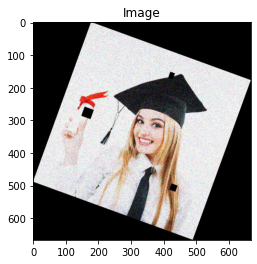

In [5]:
show_image(damaged_image)

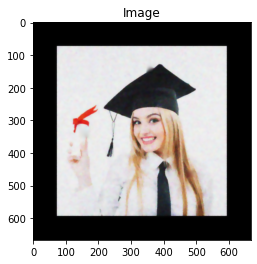

In [9]:
from skimage.restoration import denoise_tv_chambolle, inpaint
from skimage import transform

# Transform the image so it's not rotated
upright_img = transform.rotate(damaged_image, 20)

# Remove noise from the image, using the chambolle method
upright_img_without_noise = denoise_tv_chambolle(upright_img,weight=0.1, multichannel=True)

# Reconstruct the image missing parts
mask = get_mask(upright_img)
result = inpaint.inpaint_biharmonic(upright_img_without_noise, mask, multichannel=True)

show_image(result)

*Personal notes on Image Processing with Python from Datacamp